21BAI1892

#**MV AS-1 (b)**

# Task 1: Image Negative Transformation

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
img = cv.imread('grayscale_image.jpg')

In [ ]:
#convert to negative
def img_negative(img):
  return 255-img

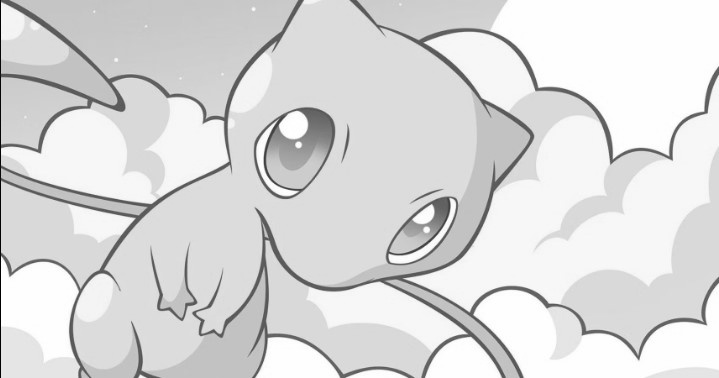

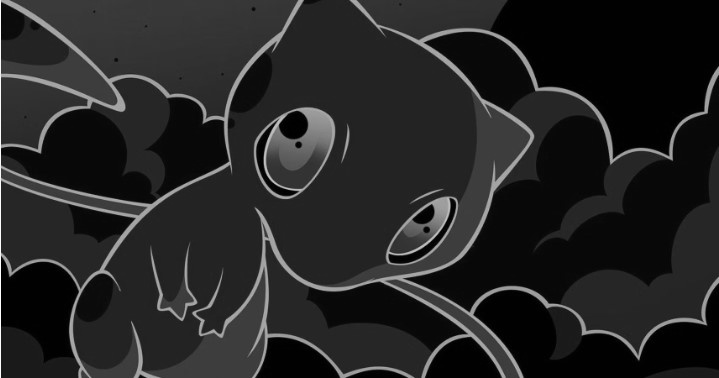

In [ ]:
#display original and negative
neg = img_negative(img)
cv2_imshow(img)
cv2_imshow(neg)

# Task 2: Gamma Correction

Modifies the brightness of an image. 1 is original, below that is lighter, above is darker.

In [ ]:
#function to perform gamma correction
def gamma_correction(img, gamma):
  n = img/255.0
  corr = np.power(n, gamma)
  corr = np.uint8(corr*255)
  return corr

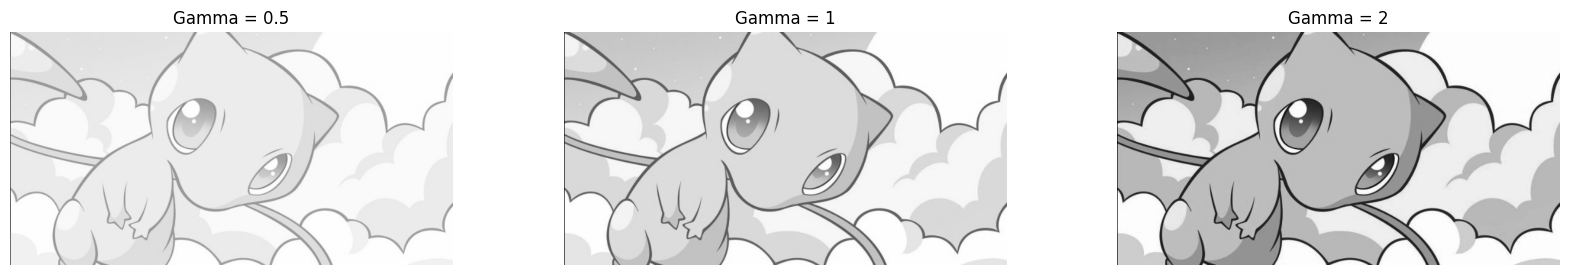

In [ ]:
#performing + plotting gamma correction
gamma = [0.5, 1, 2]
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.25)
for i, g in enumerate(gamma):
  plt.subplot(1, 3, i+1)
  plt.axis('off')
  plt.imshow(gamma_correction(img, g), cmap='gray')
  plt.title(f'Gamma = {g}')

# Task 3: Log Transform

enhances the detail of an image by liftng dark areas to make them more visible

In [ ]:
#using a darker image to show the difference better
im = cv.imread('img.png')

In [ ]:
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

In [ ]:
def log_transform(img):
  #s = c.log(1+r) is the log transformation formula
  flt = img.astype(np.float32)
  c = 255 / np.log(1+np.max(flt))
  s = c * np.log(1+flt)
  s = np.array(s, dtype=np.uint8)
  return s

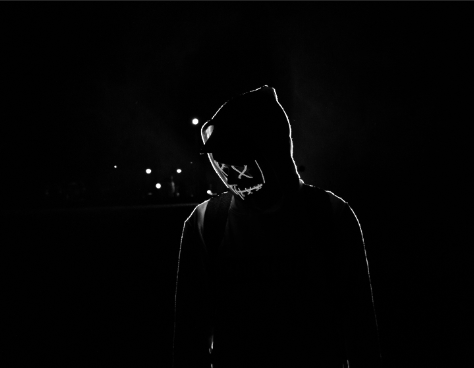

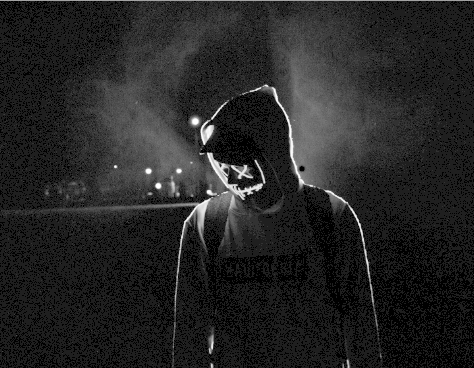

In [ ]:
s = log_transform(gray)
cv2_imshow(gray)
cv2_imshow(s)

# Task 4: Compare Transformations

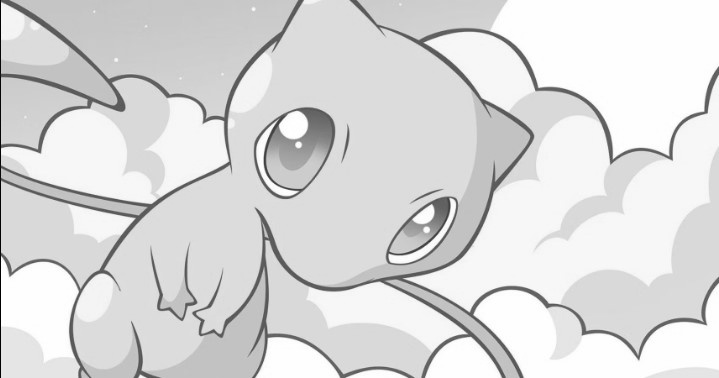

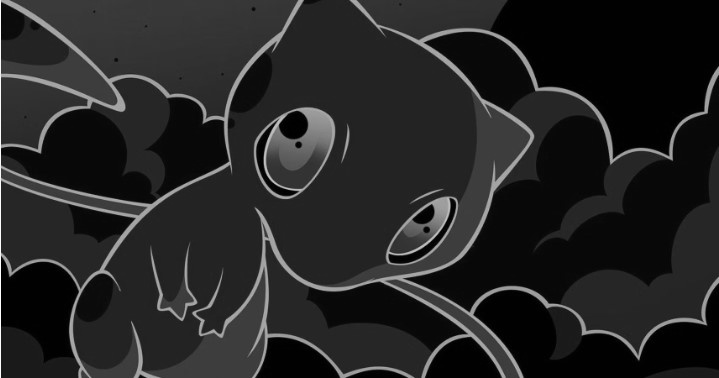

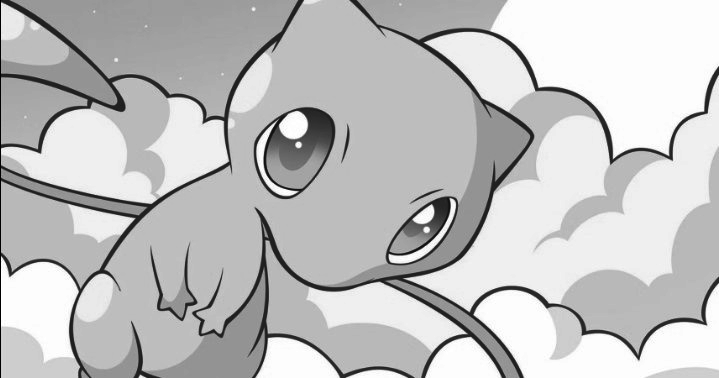

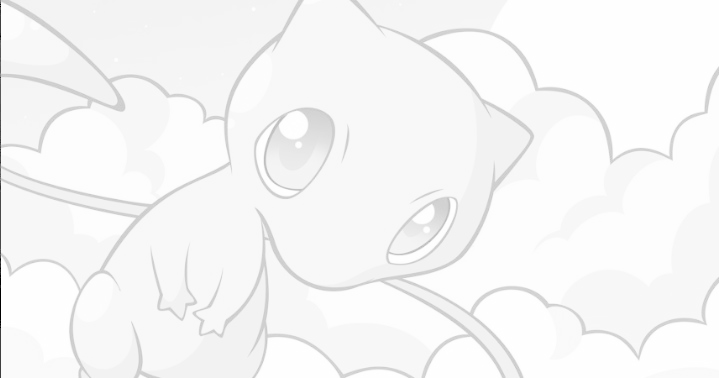

In [ ]:
g = cv.imread('grayscale_image.jpg')
g_neg = img_negative(img)
g_gamma = gamma_correction(g,2)
g_log = log_transform(g)
cv2_imshow(g)
cv2_imshow(g_neg)
cv2_imshow(g_gamma)
cv2_imshow(g_log)

# Task 5: Apply Transformations to Color Images

In [ ]:
#loading image and splitting into channels
sp = cv.imread('pkmn.jpg')

In [ ]:
b, g, r = cv.split(sp)

In [ ]:
#applying transforms on b, g, r
#applying transforms on b, g, r
b1 = 255-b
b2 = gamma_correction(b, 2)
b3 = log_transform(b)

g1 = 255-g
g2 = gamma_correction(g, 2)
g3 = log_transform(g)

r1 = 255-r
r2 = gamma_correction(r, 2)
r3 = log_transform(r)

In [ ]:
#merging channels back together
i1 = cv.merge([b1,g1,r1])
i2 = cv.merge([b2,g2,r2])
i3 = cv.merge([b3,g3,r3])

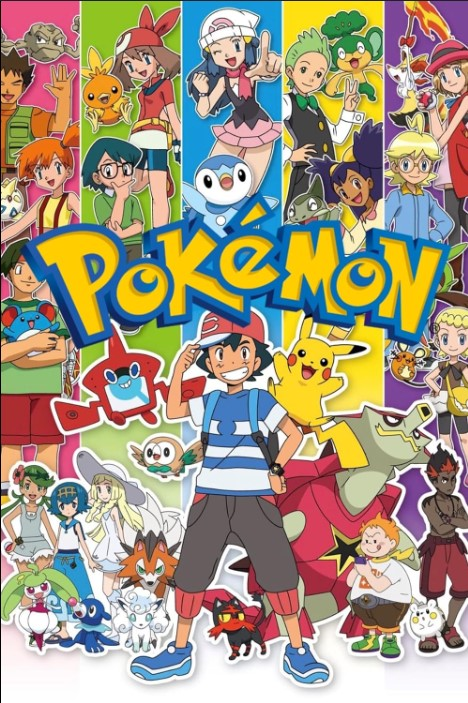

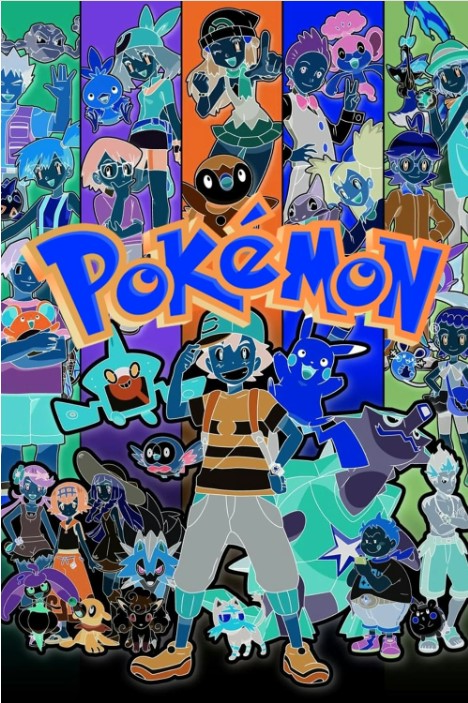

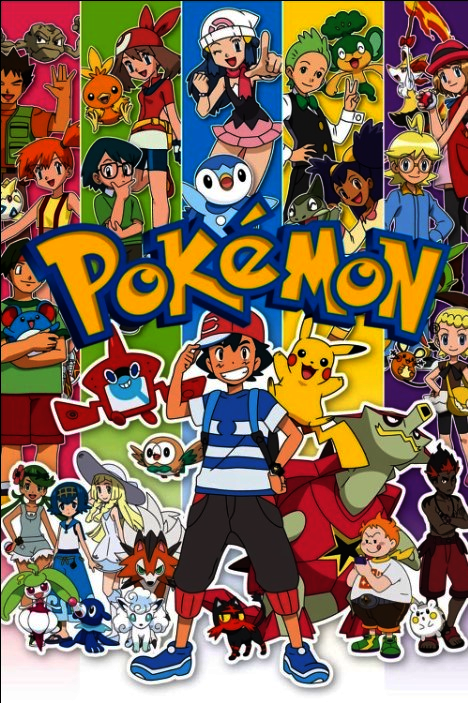

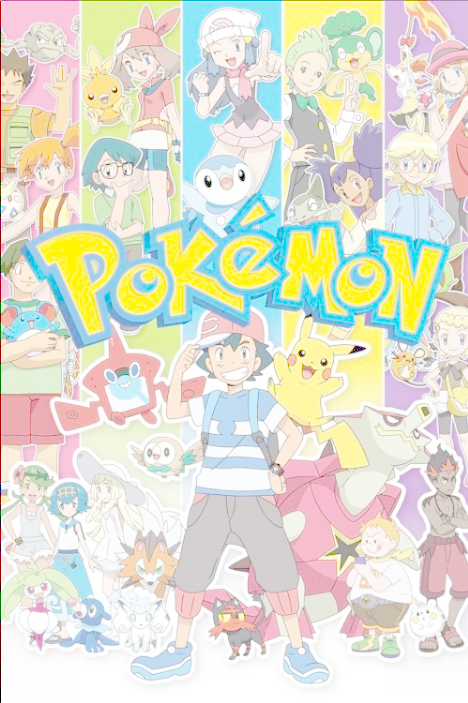

In [ ]:
cv2_imshow(sp)
cv2_imshow(i1)
cv2_imshow(i2)
cv2_imshow(i3)

Text(0.5, 1.0, 'Log')

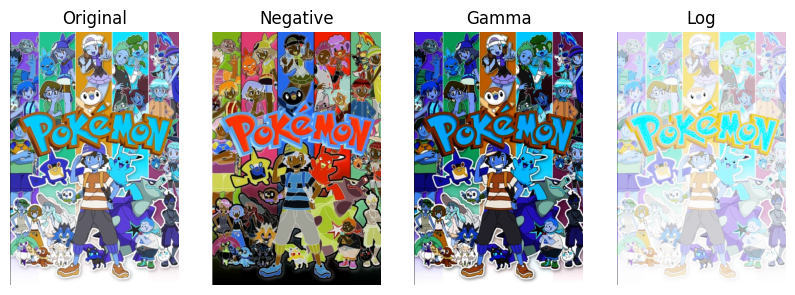

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(sp)
plt.title('Original')
plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(i1)
plt.title('Negative')
plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(i2)
plt.title('Gamma')
plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(i3)
plt.title('Log')